In [ ]:
%pip install pandas
%pip install matplotlib
%pip install nltk
%pip install scikit-learn


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df_fake = pd.read_csv(r'C:\Users\himan\Downloads\Learning\Projects\Fake News Detection\data\Fake.csv')
df_true = pd.read_csv(r'C:\Users\himan\Downloads\Learning\Projects\Fake News Detection\data\True.csv')

#Add labels to the dataframes
df_fake['label'] = 1
df_true['label'] = 0

#Concatenate the dataframes
df = pd.concat([df_fake, df_true], ignore_index=True)
# Shuffle the dataframe
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

#combine the title and text columns
df['combined_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')

#Remove null or Empty values
df = df[df['combined_text'].str.strip() != '']

#Converting the text to lowercase
df['combined_text'] = df['combined_text'].str.lower()

#remove punctuation
df['combined_text'] = df['combined_text'].str.replace(r'[^\w\s]', '', regex=True)

#remove stopwords


stop_words = set(stopwords.words('english'))
df['combined_text'] = df['combined_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

#Tokenization
tokens = word_tokenize(' '.join(df['combined_text']))

#Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in tokens]

#Remove nonalphabetic tokens
df['combined_text'] = df['combined_text'].apply(lambda x: ' '.join(word for word in x.split() if word.isalpha()))

#Apply TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['combined_text']).toarray()
y = df['label'].values



In [5]:
null_values = df.isnull().sum().sum()
print(null_values)
df.dropna(inplace=True)
null_values_after = df.isnull().sum().sum()
print(null_values_after)

NameError: name 'df' is not defined

In [5]:
#Counting real ad fake news
print(df['real'].value_counts())

real
1    17371
0     5495
Name: count, dtype: int64


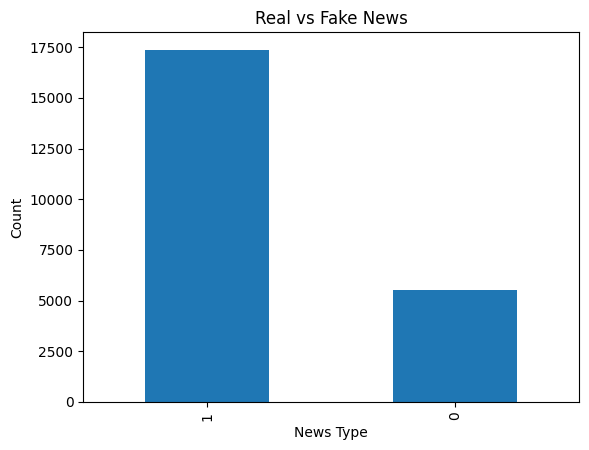

In [6]:
#Generating a bar plot for real and fake news
df['real'].value_counts().plot(kind='bar')
plt.title('Real vs Fake News')
plt.xlabel('News Type') 
plt.ylabel('Count')
plt.show()

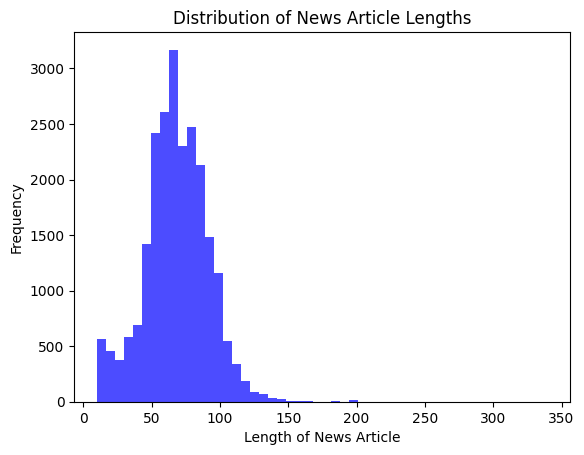

In [14]:
# Histogram of the length of news articles
df['text_length'] = df['title'].apply(len)
df['text_length'].plot(kind='hist', bins=50, color='blue', alpha=0.7)
plt.title('Distribution of News Article Lengths')
plt.xlabel('Length of News Article')
plt.ylabel('Frequency')
plt.show()

## Observation - 1
It is seen that there are 5 columns and 23,196 entries in the dataset. There are 17,371 real news and 5495 fake news. The length of the most of the news title are in the range of 50-100 characters. 

### Preprocessing 

In [ ]:
#Removing null or empty values
df = df.dropna(subset=['title', 'text'])

To do the phases above preprocessing before moving ahead